In [3]:
# !pip install git+https://github.com/openai/CLIP.git

In [5]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

C:\Users\verma\miniconda3\envs\torch\lib\site-packages\torch\nn\functional.py:5560: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Label probs: [[0.6265 0.1794 0.1941]]


In [82]:
text = clip.tokenize(["a diagram", "a dog", "a cat"]).to(device)

In [83]:
image.shape

torch.Size([1, 3, 224, 224])

In [94]:
# image = preprocess(Image.open("CLIP.png")).unsqueeze(0).to(device)
# Label probs: [[0.9927   0.004185 0.002968]]

image = cv2.imread("CLIP.png")
# Label probs: [[0.672   0.11316 0.2148 ]]
# Label probs: [[0.984    0.007057 0.0092  ]]

image = cv2.resize(image, (224,224))/255
image = torch.Tensor(image).permute(2,0,1).unsqueeze(dim=0).cuda()

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)  # prints: [[0.9927937  0.00421068 0.00299572]]

Label probs: [[0.984    0.007057 0.0092  ]]


In [50]:
image.shape

torch.Size([1, 3, 224, 224])

In [14]:
import cv2
import matplotlib.pyplot as plt

In [13]:
img = cv2.imread("table_img.jpg")

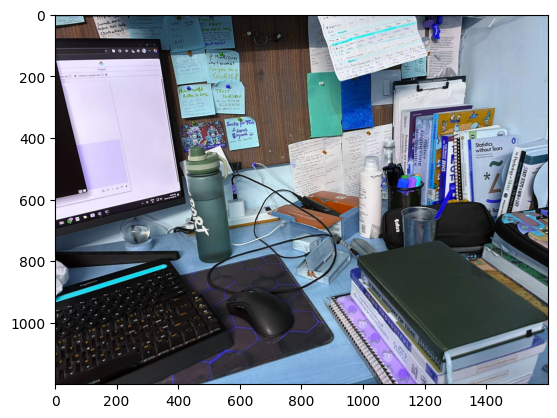

In [15]:
plt.imshow(img)

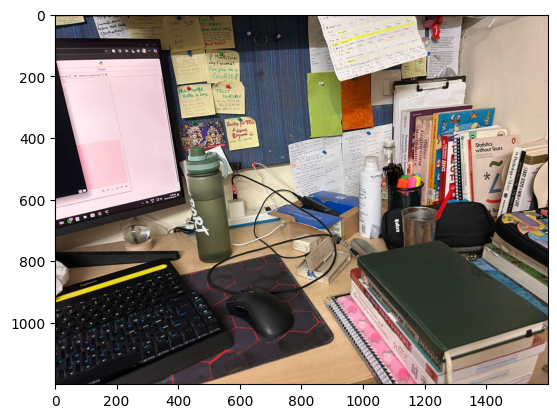

In [19]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [100]:
raw_text = ["bottle", "none"]
text = clip.tokenize(raw_text).to(device)
with torch.no_grad():
    text_features = model.encode_text(text)
text_features.shape

torch.Size([2, 512])

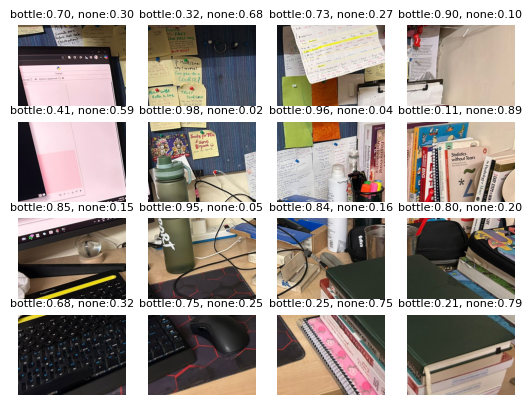

In [101]:
m = 4
n = 4
h, w, c = img.shape

nh, nw = h//m, w//n
ctr = 1
for i in range(m):
    for j in range(n):
        crop = img[i*nh:(i+1)*nh, j*nw:(j+1)*nw]


        crop.shape
        crop_res = cv2.resize(crop, (224, 224))/255 
        image = torch.Tensor(crop_res)
        # crop.permute()
        image.shape
        image = image.permute(2,0,1)
        image = image.unsqueeze(dim=0)
        image.shape
        
        with torch.no_grad():
            # image_features = model.encode_image(image.cuda())
            logits_per_image, logits_per_text = model(image.cuda(), text.cuda())
            
        probs = logits_per_image.softmax(dim=-1).cpu().numpy()
        # print(probs)
        # print(crop.shape)
        plt.subplot(m,n,ctr)
        plt.title(f"{raw_text[0]}:{probs[0][0]:.2f}, {raw_text[1]}:{probs[0][1]:.2f}", fontsize=8)
        # plt.title(f"{raw_text[0]}:{probs[0][0]:.2f}", fontsize=8)
        plt.axis(False)
        plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
        ctr+=1
        
plt.show()

In [108]:
import numpy as np
np.argmax(probs), probs

(1, array([[0.2069, 0.793 ]], dtype=float16))

In [126]:
pred = 1

In [134]:
round(probs[0][pred]*100,0)

79.0

In [173]:
def find_object(image_path, to_find):
    img = cv2.imread(image_path)
    raw_text = [to_find, "none"]
    # raw_text = [to_find, f"not {to_find}"]
    
    text = clip.tokenize(raw_text).to(device)
    with torch.no_grad():
        text_features = model.encode_text(text)
    text_features.shape
    
    m = 3
    n = 4
    h, w, c = img.shape
    nh, nw = h//m, w//n
    ctr = 1
    for i in range(m):
        for j in range(n):
            crop = img[i*nh:(i+1)*nh, j*nw:(j+1)*nw]
            crop.shape
            crop_res = cv2.resize(crop, (224, 224))/255 
            image = torch.Tensor(crop_res)
            # crop.permute()
            image.shape
            image = image.permute(2,0,1)
            image = image.unsqueeze(dim=0)
            image.shape
            
            with torch.no_grad():
                # image_features = model.encode_image(image.cuda())
                logits_per_image, logits_per_text = model(image.cuda(), text.cuda())
                
            probs = logits_per_image.softmax(dim=-1).cpu().numpy()
            # print(probs)
            # print(crop.shape)
            plt.subplot(m,n,ctr)
            # plt.title(f"{raw_text[0]}:{probs[0][0]:.2f}, {raw_text[1]}:{probs[0][1]:.2f}", fontsize=8)
            pred = np.argmax(probs)
            if(probs[0][pred]<0.80):
                pred = 1
                
            color = ["green", "red"]
            plt.title(f"{raw_text[pred]}: {round(probs[0][pred]*100,2)}%", fontsize=8, color=color[pred])
           
            plt.axis(False)
            plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
            ctr+=1
    plt.show()

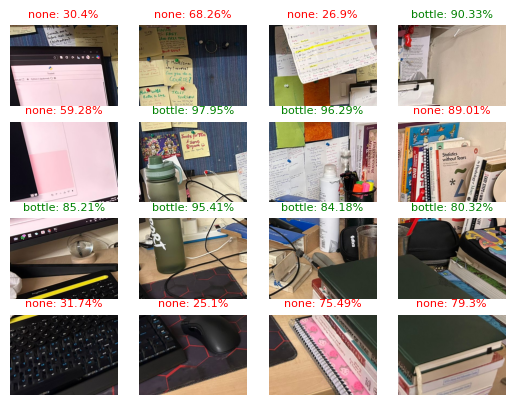

In [155]:
image_path = "table_img.jpg"
to_find = "bottle"

find_object(image_path, to_find)

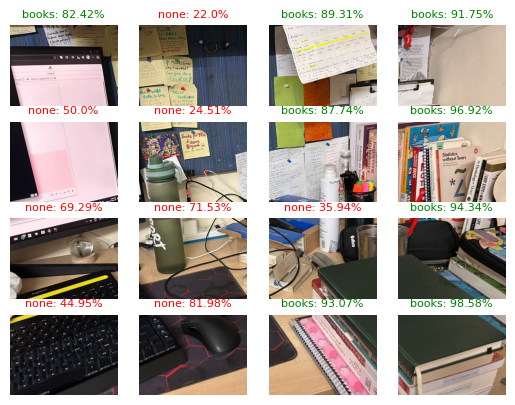

In [156]:
image_path = "table_img.jpg"
to_find = "books"

find_object(image_path, to_find)

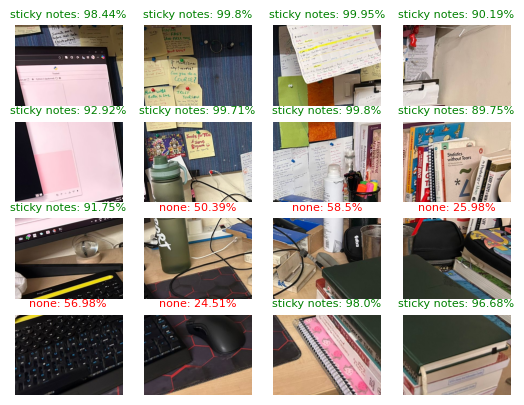

In [158]:
image_path = "table_img.jpg"
to_find = "sticky notes"

find_object(image_path, to_find)

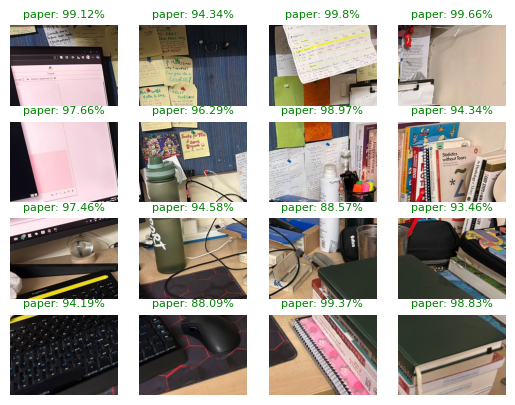

In [164]:
image_path = "table_img.jpg"
to_find = "paper"

find_object(image_path, to_find)

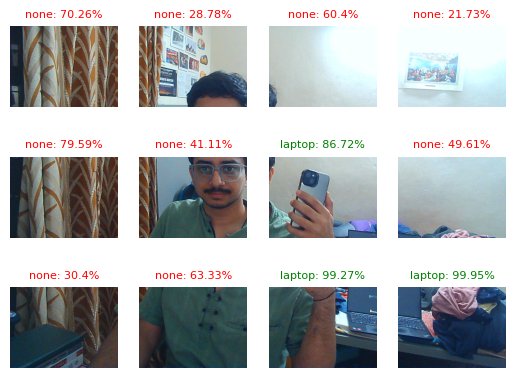

In [176]:
image_path = "room.jpg"
to_find = "laptop"

find_object(image_path, to_find)

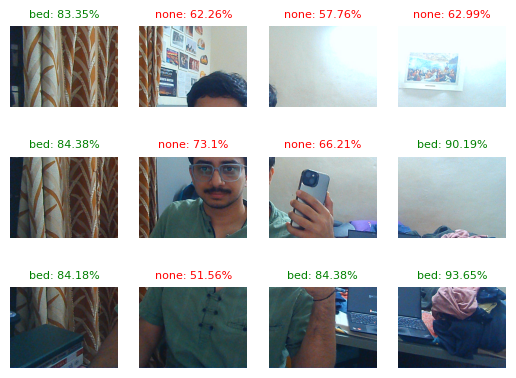

In [177]:
image_path = "room.jpg"
to_find = "bed"

find_object(image_path, to_find)

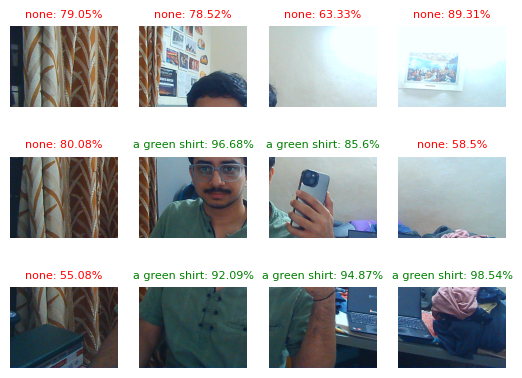

In [178]:
image_path = "room.jpg"
to_find = "a green shirt"

find_object(image_path, to_find)

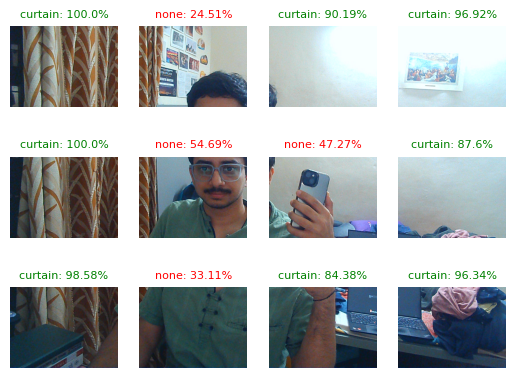

In [182]:
image_path = "room.jpg"
to_find = "curtain"

find_object(image_path, to_find)

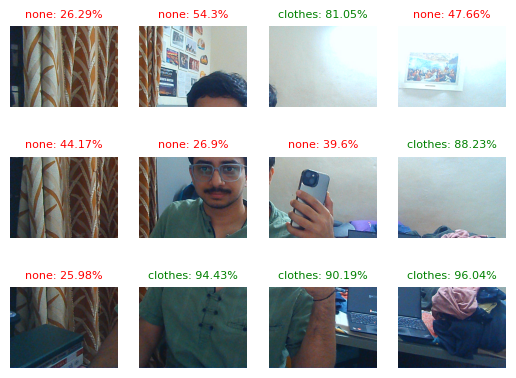

In [183]:
image_path = "room.jpg"
to_find = "clothes"

find_object(image_path, to_find)

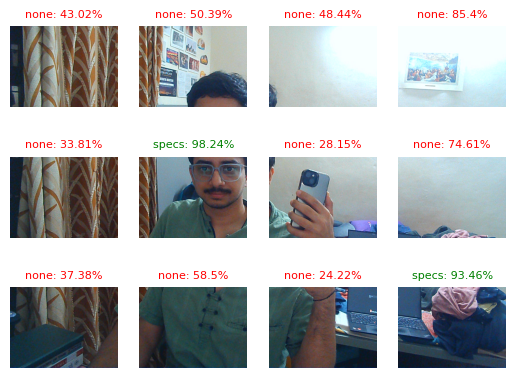

In [184]:
image_path = "room.jpg"
to_find = "specs"

find_object(image_path, to_find)